# Отчет по запасам и продажам (пример блокнота)

## Подготовка и загрузка данных

Загружаем необходимые библиотеки и настраиваем блокнот

In [1]:
import pandas as pd # обработка табличных данных
import matplotlib.pyplot as plt # построение графиков
import seaborn as sns # разведочный анализ
%matplotlib inline 
# графики будут встраиваться в блокнот

Загружаем данные по запасам

In [2]:
beer_stock = pd.read_csv('beer_stock_may.csv')
beer_stock.head()

,date,good_id,shop_id,supplier_id,quantity,avg_price,sup_stock,sale_price,sale_quantity,sale_amount,sale_sup
0,2004-05-01,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0
1,2004-05-02,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0
2,2004-05-03,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0
3,2004-05-04,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0
4,2004-05-05,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0


 - `good_id` - код товара 
 - `shop_id` - код магазина 
 - `sup_stock` - стоимость запаса в закупочных ценах
 - `sale_sup` - стоимость проданного товара в закупочных ценах

Загружаем справочник товаров

In [3]:
products = pd.read_csv('beer_metadata.csv')
products.head()

,good_id,product,subgroup,group,department
0,8090100001,ЗОЛОТАЯ БОЧКА св.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
1,8090100002,ЗОЛ.БОЧ.классика пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
2,8090100003,ЗОЛОТАЯ БОЧКАвыд.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
3,8090100004,STAROPRAMEN пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
4,8090100005,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво


Добавляем описание товара в таблицу с запасами

In [4]:
beer_stock = pd.merge(beer_stock, products, how='inner',
                     left_on = 'good_id', right_on='good_id')
beer_stock['date'] = pd.to_datetime(beer_stock['date']) # Преобразуем даты из текста
beer_stock.head()

,date,good_id,shop_id,supplier_id,quantity,avg_price,sup_stock,sale_price,sale_quantity,sale_amount,sale_sup,product,subgroup,group,department
0,2004-05-01,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0,ЗОЛОТАЯ БОЧКАвыд.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
1,2004-05-02,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0,ЗОЛОТАЯ БОЧКАвыд.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
2,2004-05-03,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0,ЗОЛОТАЯ БОЧКАвыд.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
3,2004-05-04,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0,ЗОЛОТАЯ БОЧКАвыд.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
4,2004-05-05,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0,ЗОЛОТАЯ БОЧКАвыд.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво


## Top 10 наиболее оборачиваемых товаров

Агрегируем данные об остатках и продажах: считаем среднее для остатка и сумму для продаж. Все - в закупочных ценах.

In [5]:
turnover_data = beer_stock.groupby('product').agg({'sup_stock' : 'mean', 'sale_sup' : 'sum'})
turnover_data.head()

,sup_stock,sale_sup
product,,
ALTSTEIN пиво0.5L,626.126667,261.01
ALTSTEIN банка пиво0.5L,255.758387,127.95
AMSTEL светлое пиво0.33L,651.500645,169.58
BAVARIA пиво0.5L,605.594839,276.08
BAVARIA пиво0.33L,763.525806,351.40


Считаем оборачиваемость:

$$ Оборачиваемость = \frac{Оборот}{\text{Средняя стоимость запаса}} $$

In [6]:
turnover_data['turns'] = turnover_data['sale_sup'] /  turnover_data['sup_stock']
turnover_data.head()

,sup_stock,sale_sup,turns
product,,,
ALTSTEIN пиво0.5L,626.126667,261.01,0.416865
ALTSTEIN банка пиво0.5L,255.758387,127.95,0.500277
AMSTEL светлое пиво0.33L,651.500645,169.58,0.260291
BAVARIA пиво0.5L,605.594839,276.08,0.455882
BAVARIA пиво0.33L,763.525806,351.40,0.460233


Выбираем 10 наиболее оборачиваемых товаров

In [7]:
top10 = turnover_data['turns'].nlargest(10)
top10

product
ЯРПИВО янтар.ж/б пиво0.5L    12.590466
СТ.МЕЛЬН.св. ж/б пиво0.5L    11.333258
БАЛТИКА7 экс.ж/б пиво0.5L     8.632694
КЛИНСКОЕ аррива  пиво0.5L     7.829681
БАЛТИКА3 классич.пиво0.5L     7.111812
БАЛТИКА0 б/а ж/б пиво0.5L     6.533333
БАЛТИКА8 пшен.бут.пив0.5L     6.185517
LOWENBRAU оригин.пиво0.5L     6.065542
СТ.МЕЛЬН.св.бут. пиво0.5L     5.951995
CARLSBERG св.бут.пиво0.5L     5.857252
Name: turns, dtype: float64

Визуализация результатов

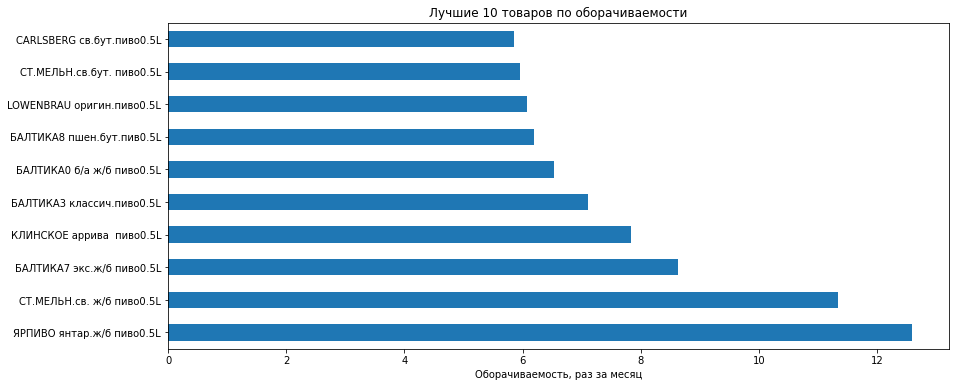

In [8]:
plt.figure(figsize=(14,6)) # Размер рисунка
top10.plot(kind='barh') # Строим график

plt.title('Лучшие 10 товаров по оборачиваемости')
plt.xlabel('Оборачиваемость, раз за месяц')
plt.ylabel(None)

plt.show()

## Стоимость запасов в сети в разрезе товарных подкатегорий

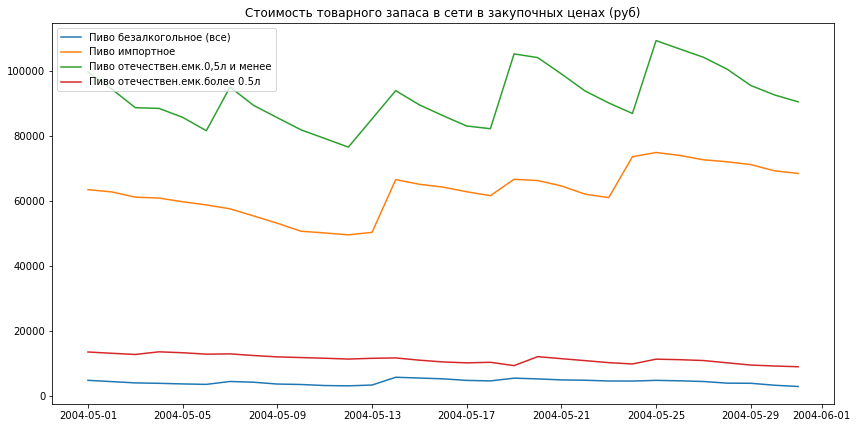

In [9]:
plt.figure(figsize=(14,7)) # Размер рисунка

for subgroup, stock in beer_stock.groupby('subgroup'): # для каждой подгруппы добавляем линию на график
    stock_amount = stock.groupby('date')['sup_stock'].sum() # суммарный остаток на каждую дату
    plt.plot(stock_amount,
           label=subgroup)
    
plt.legend(loc='upper left')
plt.title('Стоимость товарного запаса в сети в закупочных ценах (руб)')
plt.show()

## Трафик покупателей по часам и дням недели

Загружаем данные по продажам (строки чеков)

In [10]:
beer_sales = pd.read_csv('beer_cheques_may.csv')
beer_sales['time'] = pd.to_datetime(beer_sales['time']) # Преобразуем отметку времени из текста
beer_sales.head()

,check_id,time,good_id,shop_id,quantity,sale_price,cost_price,amount,discount
0,89922,2004-05-02 20:13:00,8090100162,100,1,17.69,13.313,17.69,0.00
1,89922,2004-05-02 20:13:00,8090100162,100,1,17.69,13.313,17.69,0.00
2,89922,2004-05-02 20:13:00,8090100162,100,1,17.69,13.313,17.69,0.00
3,105139,2004-05-03 17:12:00,8090100162,100,1,18.50,13.983,18.50,0.00
4,97347,2004-05-03 21:28:00,8090100162,100,1,18.50,13.983,17.94,0.56


Построим тепловую карту количества посетителей для каждого магазина отдельно.   
Чтобы не повторять код, напишем функцию для построения графика для выбранного магазина

In [11]:
def plot_shop_load(shop_id, data):
    """
    Выводит тепловую карту с количеством посетителей для заданного магазина.
    shop_id - код магазина
    data - строки чеков для всех магазинов
    """
    
    weekdays = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
    
    shop_data = data[data['shop_id'] == shop_id].copy() # Отбираем данные для заданного магазина
    
    shop_data['hour'] = shop_data['time'].dt.hour # выделяем час
    shop_data['dayofweek'] = shop_data['time'].dt.dayofweek # выделяем день недели 
    
    # Считаем число уникальных чеков (посетителей):
    num_visitors = shop_data.groupby(['dayofweek', 'hour'])['check_id'].count().unstack()
    
    # Визуализируем
    plt.figure(figsize=(14, 5))     
    sns.heatmap(num_visitors, yticklabels=weekdays)
    plt.xlabel('Час')
    plt.ylabel(None)
    plt.title(f'Количество посетителей, купивших пиво в магазине {shop_id}')
    plt.show()    

Пробуем функцию на одном магазине:

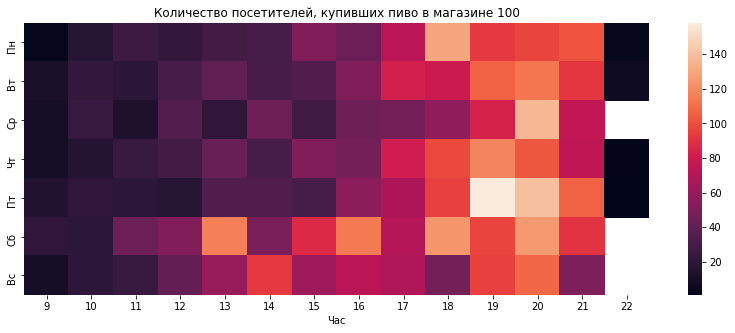

In [12]:
plot_shop_load(100, beer_sales)

Применяем функцию ко всем магазинам

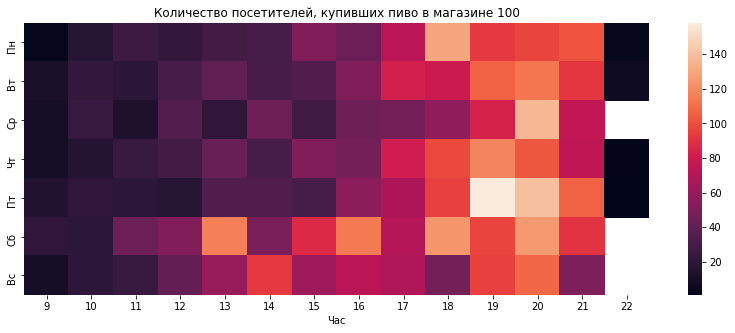

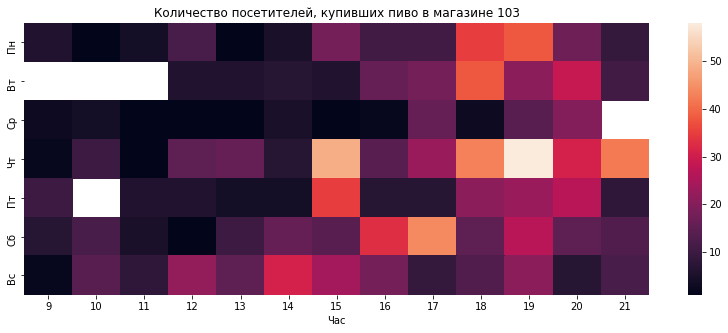

In [13]:
for shop in beer_sales['shop_id'].unique():
    plot_shop_load(shop, beer_sales)